# Pull NWIS Data using a URL

In [100]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from urllib.request import urlopen
%matplotlib notebook  

# Start timer to see how long it takes for your script to run
startTime = datetime.now()

In [101]:
# Function to pull NWIS data from url and save to csv

def pull_nwis_data(parameter, site_number, start_date, end_date, site_name):
    nwis_url = f'https://nwis.waterdata.usgs.gov/nwis/uv?cb_{parameter}=on&format=rdb&site_no={site_number}&period=&begin_date={start_date}&end_date={end_date}'
    print(nwis_url)    
    
    # Find where in the file the data actually starts and skip rows
    for sr in range(25, 35):
        try:
            df = pd.read_table(nwis_url, skiprows=sr)
            if df.columns.values[0] == '5s':
                break
        except:
            print('Dormammu I have come to bargain') # Dr. Strange reference anyone?
            
    # Rename the columns to something easier to read
    columns = ['Name', 'Site', 'DateTime', 'Tz', f'{parameter}', 'qual_code']
    print(columns)
    
    # Read the table, skipping the rows
    df = pd.read_table(nwis_url, skiprows=sr+1, names=columns)

    # Export to csv with the title you give 
    df.to_csv(f"{site_name}"+'.csv')
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df

In [102]:
# Call the function to pull NWIS data
parameter = '00060'
Shoal_Ck_15min = pull_nwis_data(parameter=parameter, site_number='08156800', start_date='2018-02-01', end_date='2018-02-18', site_name='08156800')
Shoal_Ck_15min.head()


https://nwis.waterdata.usgs.gov/nwis/uv?cb_00060=on&format=rdb&site_no=08156800&period=&begin_date=2018-02-01&end_date=2018-02-18
Dormammu I have come to bargain
['Name', 'Site', 'DateTime', 'Tz', '00060', 'qual_code']


,Name,Site,DateTime,Tz,00060,qual_code
0,USGS,8156800,2018-02-01 00:00:00,CST,0.03,A
1,USGS,8156800,2018-02-01 00:05:00,CST,0.02,A
2,USGS,8156800,2018-02-01 00:10:00,CST,0.02,A
3,USGS,8156800,2018-02-01 00:15:00,CST,0.09,A
4,USGS,8156800,2018-02-01 00:20:00,CST,0.04,A


<IPython.core.display.Javascript object>


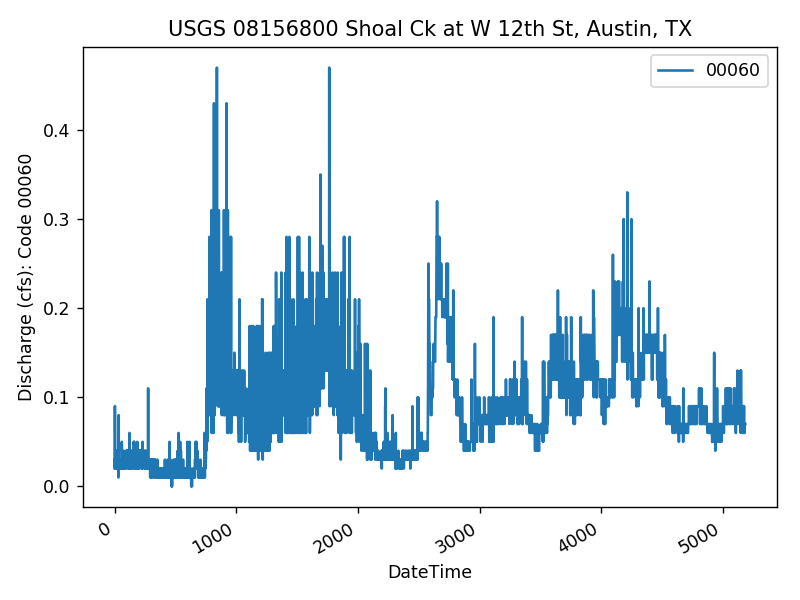

In [109]:
# Give the plot a title
site_name='USGS 08156800 Shoal Ck at W 12th St, Austin, TX'

fig, ax = plt.subplots()
x = Shoal_Ck_15min.index
y = Shoal_Ck_15min[f'{parameter}']
# ax.plot(Shoal_Ck_15min['DateTime'], Shoal_Ck_15min[f'{parameter}']) <--- you could also define your x and y within the ax.plot function

ax.plot(x, y)
plt.xlabel('DateTime')
plt.ylabel('Discharge (cfs): Code '+ f'{parameter}')
# plt.title('USGS 08156800 Shoal Ck at W 12th St, Austin, TX: Discharge') <--- this way works too
plt.title(site_name)
plt.legend()
fig.autofmt_xdate()
fig.tight_layout()

plt.show();

In [104]:
# Call the function to pull NWIS data
parameter = '00060'
Shoal_Ck_15min = pull_nwis_data(parameter=parameter, site_number='08156800', start_date='2018-02-01', end_date='2018-02-18', site_name='08156800')
Shoal_Ck_15min.head(10)

https://nwis.waterdata.usgs.gov/nwis/uv?cb_00060=on&format=rdb&site_no=08156800&period=&begin_date=2018-02-01&end_date=2018-02-18
Dormammu I have come to bargain
['Name', 'Site', 'DateTime', 'Tz', '00060', 'qual_code']


,Name,Site,DateTime,Tz,00060,qual_code
0,USGS,8156800,2018-02-01 00:00:00,CST,0.03,A
1,USGS,8156800,2018-02-01 00:05:00,CST,0.02,A
2,USGS,8156800,2018-02-01 00:10:00,CST,0.02,A
3,USGS,8156800,2018-02-01 00:15:00,CST,0.09,A
4,USGS,8156800,2018-02-01 00:20:00,CST,0.04,A
5,USGS,8156800,2018-02-01 00:25:00,CST,0.02,A
6,USGS,8156800,2018-02-01 00:30:00,CST,0.02,A
7,USGS,8156800,2018-02-01 00:35:00,CST,0.02,A
8,USGS,8156800,2018-02-01 00:40:00,CST,0.03,A
9,USGS,8156800,2018-02-01 00:45:00,CST,0.03,A


In [105]:
# We can resample the 15 minute data to make it hourly
# this resamples a datetime index to hourly and averages each value within the hour 

Shoal_Ck_hr = Shoal_Ck.resample('h', on=str('DateTime')).mean() 
Shoal_Ck_hr.head(10)

,Site,00060
DateTime,,
2018-02-01 00:00:00,8156800,0.030833
2018-02-01 01:00:00,8156800,0.030000
2018-02-01 02:00:00,8156800,0.030833
2018-02-01 03:00:00,8156800,0.022500
2018-02-01 04:00:00,8156800,0.025833
2018-02-01 05:00:00,8156800,0.027500
2018-02-01 06:00:00,8156800,0.025833
2018-02-01 07:00:00,8156800,0.028333
2018-02-01 08:00:00,8156800,0.034167


# Example: plotting two datasets on the same plot
## Both resolutions plotted together

<IPython.core.display.Javascript object>


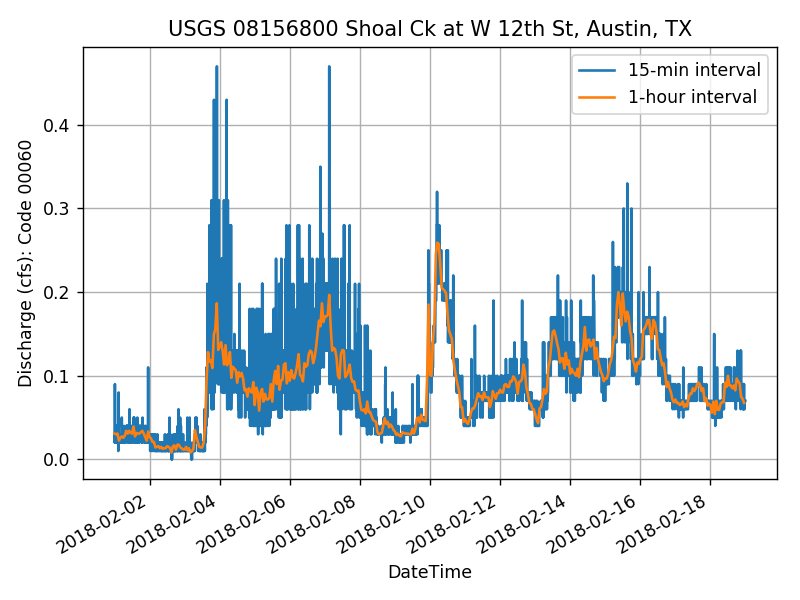

In [120]:
site_name='USGS 08156800 Shoal Ck at W 12th St, Austin, TX'

fig, ax = plt.subplots()

# 15-minute discharge data
x_15 = Shoal_Ck_15min.index
y_15 = Shoal_Ck_15min[f'{parameter}']
ax.plot(Shoal_Ck_15min['DateTime'], Shoal_Ck_15min[f'{parameter}'], label="15-min interval")

# Hourly discharge data
x_hour = Shoal_Ck_hr.index 
y_hour = Shoal_Ck_hr[f'{parameter}']
ax.plot(Shoal_Ck_hr.index, Shoal_Ck_hr[f'{parameter}'], label="1-hour interval")

# Add necessary 
plt.xlabel('DateTime')
plt.ylabel('Discharge (cfs): Code '+ f'{parameter}')
# plt.title('USGS 08156800 Shoal Ck at W 12th St, Austin, TX: Discharge') <--- this way works too
plt.title(site_name)
plt.legend()
plt.grid()
fig.autofmt_xdate()
fig.tight_layout()
plt.savefig('demo_figure.png')
plt.show();